In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("neo.csv")
data.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


Число объектов - 90836, Число признаков - 10


<Figure size 1080x648 with 0 Axes>

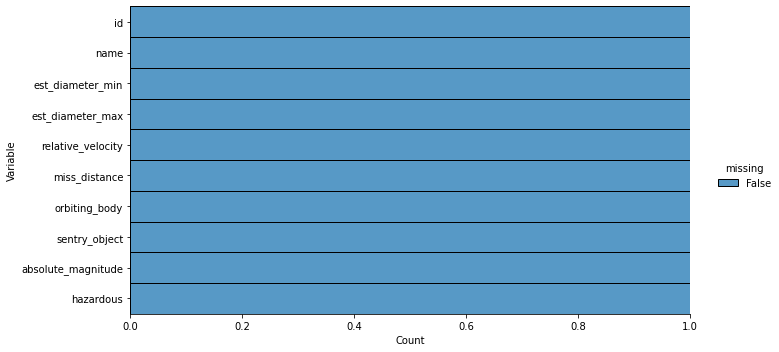

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
print(f"Число объектов - {data.shape[0]}, Число признаков - {data.shape[1]}")

plt.figure(figsize=(15,9))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.xlabel("Count")
plt.ylabel("Variable")
plt.show()

data.isna().sum()

In [ ]:
data = data.dropna()
print(f"Число объектов - {data.shape[0]}, Число признаков - {data.shape[1]}")

Число объектов - 90836, Число признаков - 10


In [ ]:
data.drop(['name', 'id'], axis=1, inplace=True)
replacement = OrdinalEncoder()
replacement.fit(data[["orbiting_body"]])
data['orbiting_body'] = replacement.transform(data[["orbiting_body"]])

replacement = OrdinalEncoder()
replacement.fit(data[["sentry_object"]])
data['sentry_object'] = replacement.transform(data[["sentry_object"]])

replacement = OrdinalEncoder()
replacement.fit(data[["hazardous"]])
data['hazardous'] = replacement.transform(data[["hazardous"]])
data.head(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,0.0,0.0,16.73,0.0
1,0.265800,0.594347,73588.726663,6.143813e+07,0.0,0.0,20.00,1.0
2,0.722030,1.614507,114258.692129,4.979872e+07,0.0,0.0,17.83,0.0
3,0.096506,0.215794,24764.303138,2.543497e+07,0.0,0.0,22.20,0.0
4,0.255009,0.570217,42737.733765,4.627557e+07,0.0,0.0,20.09,1.0
5,0.036354,0.081291,34297.587778,4.058569e+07,0.0,0.0,24.32,0.0
6,0.171615,0.383743,27529.472307,2.906912e+07,0.0,0.0,20.95,0.0
7,0.005328,0.011914,57544.470083,5.511502e+07,0.0,0.0,28.49,0.0
8,0.350393,0.783502,56625.210122,6.903598e+07,0.0,0.0,19.40,0.0
9,0.105817,0.236614,48425.840329,3.835526e+07,0.0,0.0,22.00,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['hazardous'], axis=1), data['hazardous'], test_size=0.1)
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)
print(model.intercept_[0], end=' ')
w = model.coef_
for i in range(w[0].shape[0]):
  print('+', w[0][i], data.columns[i], end = ' ')

# Исходя из того, что все коэффиценты крайне малы,
# можно сделать вывод о том, что зависимости между
# между опасность тела и его признаками нет

-7.97421386297027e-10 + 9.290930954001262e-11 est_diameter_min + 2.077515318716996e-10 est_diameter_max + -1.6464836631530625e-05 relative_velocity + -2.9545340075241017e-08 miss_distance + 0.0 orbiting_body + 0.0 sentry_object + -2.2523701454478044e-08 absolute_magnitude 

In [ ]:
pred = model.predict(x_test)

In [ ]:
matrix = confusion_matrix(y_test, pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
matrix

TN: 8199
FP: 0
FN: 885
TP: 0


array([[8199,    0],
       [ 885,    0]])

In [ ]:
my_accuracy = (tp+tn)/(tp+tn+fp+fn)
my_recall = tp/(tp+fn)
my_precision = tp/(tp+fp)
my_f1 = (2 * my_accuracy * my_recall)/(my_precision + my_recall)

print('My accuracy', my_accuracy, "Another accuracy", accuracy_score(y_test, pred))
print('My recall', my_recall, "Another recall", recall_score(y_test, pred))
print('My precision', my_precision, "Another precision", precision_score(y_test, pred))
print('My f1', my_f1, "Another f1", f1_score(y_test, pred))

# На основе полученных метрик видно,
# что полученная модель работает более чем плохо
# и расставляет на всех ответах нули

My accuracy 0.9025759577278731 Another accuracy 0.9025759577278731
My recall 0.0 Another recall 0.0
My precision nan Another precision 0.0
My f1 nan Another f1 0.0


<ipython-input-67-585d5261fc65>:3: RuntimeWarning: invalid value encountered in long_scalars
  my_precision = tp/(tp+fp)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data.drop(['orbiting_body', 'sentry_object'], axis=1, inplace=True)

(array([0., 1.]), array([81996,  8840]))


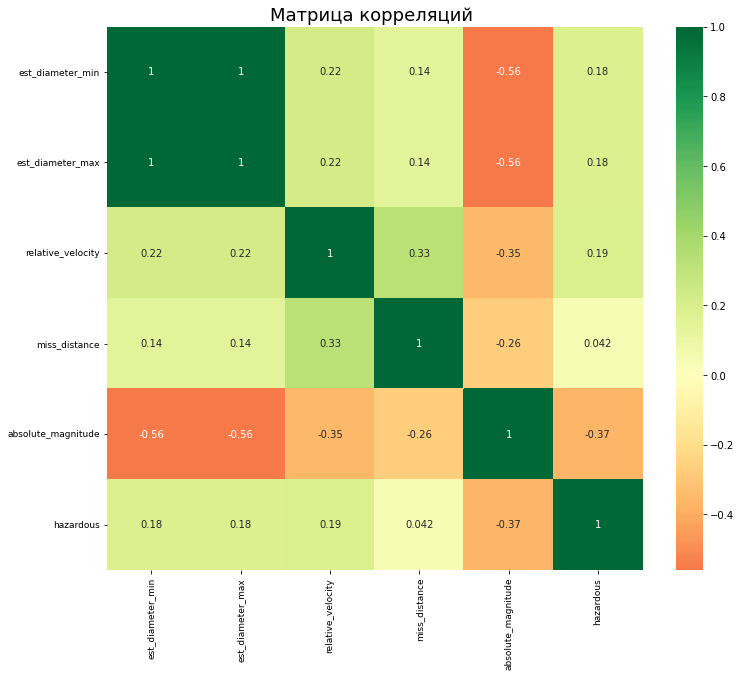

In [ ]:
print(np.unique(data['hazardous'], return_counts=True))

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляций ', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [ ]:
j = 0
for i in range(90836-8840):
  if data.loc[i+j, 'hazardous'] == 0:
    data = data.drop(i+j)
  else:
    j+=1

In [ ]:
print(np.unique(data['hazardous'], return_counts=True))
data.head(10)

(array([0., 1.]), array([7590, 8840]))


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1.0
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0.0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1.0
5,0.036354,0.081291,34297.587778,4.058569e+07,24.32,0.0
10,0.252671,0.564989,58430.697200,3.833750e+07,20.11,1.0
11,0.152952,0.342011,64393.928316,7.198311e+07,21.20,0.0
23,0.201630,0.450858,115899.180498,1.510102e+07,20.60,1.0
24,0.050647,0.113250,33803.166561,7.039487e+07,23.60,0.0
27,0.110804,0.247765,48655.305132,3.279775e+07,21.90,1.0
28,0.031956,0.071456,17906.491092,6.697931e+07,24.60,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['hazardous'], axis=1), data['hazardous'], test_size=0.3)
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)
print(model.intercept_[0], end=' ')
w = model.coef_
for i in range(w[0].shape[0]):
  print('+', w[0][i], data.columns[i], end = ' ')

2.585727807151516e-11 + 1.4763030198486776e-10 est_diameter_min + 3.301113907776294e-10 est_diameter_max + 1.4894402353714579e-05 relative_velocity + -1.4104483414926992e-08 miss_distance + -2.1912682570791906e-09 absolute_magnitude 

In [ ]:
pred = model.predict(x_test)

In [ ]:
matrix = confusion_matrix(y_test, pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
matrix

TN: 786
FP: 1502
FN: 520
TP: 2121


array([[ 786, 1502],
       [ 520, 2121]])

In [ ]:
my_accuracy = (tp+tn)/(tp+tn+fp+fn)
my_recall = tp/(tp+fn)
my_precision = tp/(tp+fp)
my_f1 = (2 * my_accuracy * my_recall)/(my_precision + my_recall)

print('My accuracy', my_accuracy, "Another accuracy", accuracy_score(y_test, pred))
print('My recall', my_recall, "Another recall", recall_score(y_test, pred))
print('My precision', my_precision, "Another precision", precision_score(y_test, pred))
print('My f1', my_f1, "Another f1", f1_score(y_test, pred))

My accuracy 0.5897748021911138 Another accuracy 0.5897748021911138
My recall 0.8031048845134419 Another recall 0.8031048845134419
My precision 0.5854264421749931 Another precision 0.5854264421749931
My f1 0.682233112496298 Another f1 0.6772030651340996
